In [99]:
import numpy as np
import pandas as pd
matches=pd.read_csv('matches.csv')
matches.info()
matches[pd.isnull(matches['winner'])]
matches['winner'].fillna('Draw', inplace=True)
matches.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Rising Pune Supergiant','Kochi Tuskers Kerala','Pune Warriors']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','RPS','KTK','PW'],inplace=True)
# creating a dictionary with "team1", "team2","toss_winner"."winner" as main parameters
encode = {'team1': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'team2': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'toss_winner': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'winner': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13,'Draw':14}}
matches.replace(encode, inplace=True)
matches.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               636 non-null    int64  
 1   season           636 non-null    int64  
 2   city             629 non-null    object 
 3   date             636 non-null    object 
 4   team1            636 non-null    object 
 5   team2            636 non-null    object 
 6   toss_winner      636 non-null    object 
 7   toss_decision    636 non-null    object 
 8   result           636 non-null    object 
 9   dl_applied       636 non-null    int64  
 10  winner           633 non-null    object 
 11  win_by_runs      636 non-null    int64  
 12  win_by_wickets   636 non-null    int64  
 13  player_of_match  633 non-null    object 
 14  venue            636 non-null    object 
 15  umpire1          635 non-null    object 
 16  umpire2          635 non-null    object 
 17  umpire3         

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,10,3,3,field,normal,0,10,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,1,11,11,field,normal,0,11,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,8,2,2,field,normal,0,2,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,11,9,9,field,normal,0,9,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,3,7,3,bat,normal,0,3,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [100]:
matches[pd.isnull(matches['city'])] #checking for the empty slots
matches['city'].fillna('Dubai',inplace=True)
matches.describe()


,id,season,team1,team2,toss_winner,dl_applied,winner,win_by_runs,win_by_wickets,umpire3
count,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,0.0
mean,318.500000,2012.490566,5.540881,5.511006,5.371069,0.025157,5.309748,13.682390,3.372642,NaN
std,183.741666,2.773026,3.329169,3.341677,3.293140,0.156726,3.288726,23.908877,3.420338,NaN
min,1.000000,2008.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,NaN
25%,159.750000,2010.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,0.000000,NaN
50%,318.500000,2012.000000,5.000000,5.000000,5.000000,0.000000,5.000000,0.000000,4.000000,NaN
75%,477.250000,2015.000000,9.000000,8.000000,7.250000,0.000000,8.000000,20.000000,7.000000,NaN
max,636.000000,2017.000000,13.000000,13.000000,13.000000,1.000000,14.000000,146.000000,10.000000,NaN


In [101]:
dicVal = encode['winner'] #provides the dictionary value to it
print(dicVal['MI']) #key value
print(list(dicVal.keys())[list(dicVal.values()).index(1)])
matches = matches[['team1','team2','city','toss_decision','toss_winner','venue','winner']]
matches.head(5)


1
MI


,team1,team2,city,toss_decision,toss_winner,venue,winner
0,10,3,Hyderabad,field,3,"Rajiv Gandhi International Stadium, Uppal",10
1,1,11,Pune,field,11,Maharashtra Cricket Association Stadium,11
2,8,2,Rajkot,field,2,Saurashtra Cricket Association Stadium,2
3,11,9,Indore,field,9,Holkar Cricket Stadium,9
4,3,7,Bangalore,bat,3,M Chinnaswamy Stadium,3


No of toss winners by each team
MI -> 85
KKR -> 78
DD -> 72
RCB -> 70
KXIP -> 68
CSK -> 66
RR -> 63
DC -> 43
SRH -> 35
PW -> 20
GL -> 15
RPS -> 13
KTK -> 8
No of match winners by each team
MI -> 92
CSK -> 79
KKR -> 77
RCB -> 73
KXIP -> 70
RR -> 63
DD -> 62
SRH -> 42
DC -> 29
RPS -> 15
GL -> 13
PW -> 12
KTK -> 6
Draw -> 3


[]

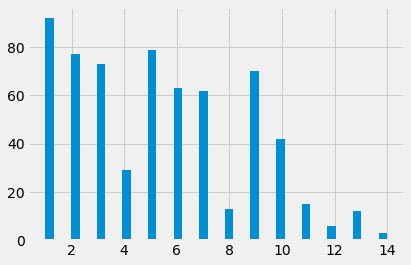

In [102]:
df = pd.DataFrame(matches)
df.describe()
temp1=df['toss_winner'].value_counts(sort=True)
temp2=df['winner'].value_counts(sort=True)
print('No of toss winners by each team')
for idx, val in temp1.iteritems():
   print('{} -> {}'.format(list(dicVal.keys())[list(dicVal.values()).index(idx)],val))
print('No of match winners by each team')
for idx, val in temp2.iteritems():
   print('{} -> {}'.format(list(dicVal.keys())[list(dicVal.values()).index(idx)],val))
df['winner'].hist(bins=40).plot()

Text(0.5, 1.0, 'Match winners')

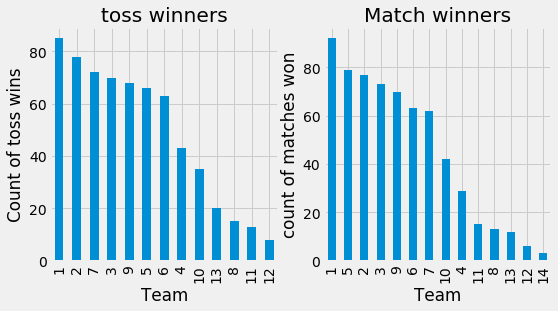

In [103]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Team')
ax1.set_ylabel('Count of toss wins')
ax1.set_title("toss winners")
temp1.plot(kind='bar')

ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('Team')
ax2.set_ylabel('count of matches won')
ax2.set_title("Match winners")

In [104]:
df.apply(lambda x: sum(x.isnull()),axis=0) #Checks for null values in the rows


team1            0
team2            0
city             0
toss_decision    0
toss_winner      0
venue            0
winner           0
dtype: int64

In [105]:
df[pd.isnull(df['city'])] #Checks for null values in the columns

,team1,team2,city,toss_decision,toss_winner,venue,winner


In [106]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['city','toss_decision','venue']
le = LabelEncoder() #adding variables to the column names
for i in var_mod:
    df[i] = le.fit_transform(df[i]) #fitting the data before transformation in order to over come the labelling issue
df.dtypes


team1            int64
team2            int64
city             int32
toss_decision    int32
toss_winner      int64
venue            int32
winner           int64
dtype: object

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold      # cross_validation has been removed from the libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
# defining the own model
def classification_model(model, data, predictors, outcome):
  model.fit(data[predictors],data[outcome])
  predictions = model.predict(data[predictors])
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print('Accuracy : %s' % '{0:.3%}'.format(accuracy))
  kf = KFold(data.shape[0], n_folds=7)         # better to split the data as train and testing
  error = []
  for train, test in kf:
    train_predictors = (data[predictors].iloc[train,:])
    train_target = data[outcome].iloc[train]
    model.fit(train_predictors, train_target)
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
  print('Cross-Validation Score : %s' % '{0:.3%}'.format(np.mean(error)))

  model.fit(data[predictors],data[outcome])

from sklearn.ensemble import RandomForestRegressor
outcome_var=['winner']
predictor_var = ['team1','team2','toss_winner']
model = LogisticRegression()
classification_model(model, df,predictor_var,outcome_var)
df.head(3)

Accuracy : 24.057%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


TypeError: __init__() got an unexpected keyword argument 'n_folds'

In [108]:
model = RandomForestClassifier(n_estimators=100)
outcome_var = ['winner']
predictor_var = ['team1', 'team2', 'venue', 'toss_winner','city','toss_decision']
classification_model(model, df,predictor_var,outcome_var)
df.head(7)

Accuracy : 89.151%


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


TypeError: __init__() got an unexpected keyword argument 'n_folds'

In [110]:
team1='MI'
team2='CSK'
toss_winner='MI'
input=[dicVal[team1],dicVal[team2],'14',dicVal[toss_winner],'2','1']
input = np.array(input).reshape((1, -1))
output=model.predict(input)
print("Possible winner : "+list(dicVal.keys())[list(dicVal.values()).index(output)])

Possible winner : MI


In [12]:
imp_input = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print(imp_input)

team2            0.250232
team1            0.223288
toss_winner      0.172128
venue            0.167511
city             0.153785
toss_decision    0.033057
dtype: float64


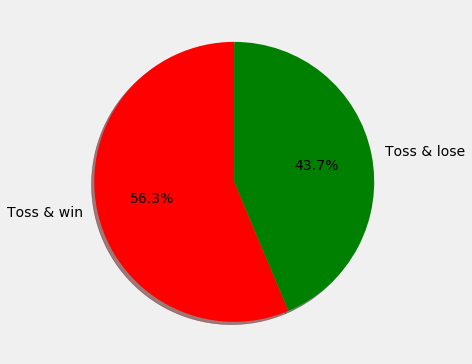

In [13]:
import matplotlib.pyplot as mlt
mlt.style.use('fivethirtyeight')
df_fil=df[df['toss_winner']==df['winner']]
slices=[len(df_fil),(577-len(df_fil))]
mlt.pie(slices,labels=['Toss & win','Toss & lose'],startangle=90,shadow=True,explode=(0,0),autopct='%1.1f%%',colors=['r','g'])
fig = mlt.gcf()
fig.set_size_inches(6,6)
mlt.show()

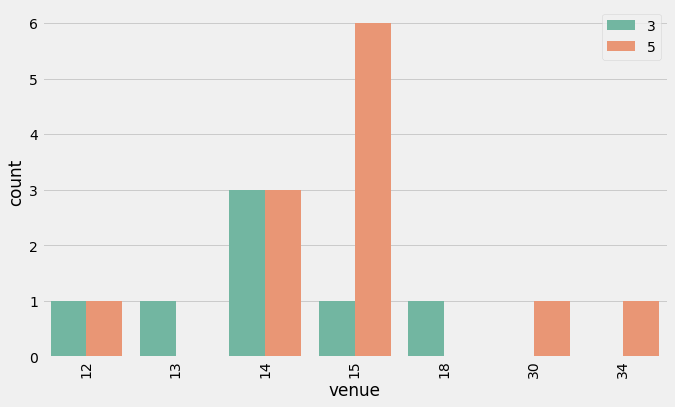

In [16]:
import seaborn as sns
team1=dicVal['CSK']
team2=dicVal['RCB']
mtemp=matches[((matches['team1']==team1)|(matches['team2']==team1))&((matches['team1']==team2)|(matches['team2']==team2))]
sns.countplot(x='venue', hue='winner',data=mtemp,palette='Set2')
mlt.xticks(rotation='vertical')
leg = mlt.legend( loc = 'upper right')
fig=mlt.gcf()
fig.set_size_inches(10,6)
mlt.show()

In [18]:
le.classes_[1]  #type the match number

'Brabourne Stadium'

## Prediction  Analysis with completely new Data_Set_2019

In [112]:
pa_df=pd.read_csv("ModelTestOutput1.csv")
pa_df.head(5)

,Match_ID,Team_1,Team_2,Toss_Winner,Score_1,Score_2,Actual_WIN,Venue,Unnamed: 8,Choice,T_P,T_N,Predicted_WIN,Tied,Predicted_Score_1,Predicted_Score_2
0,1,CSK,RCB,CSK,71,70,CSK,Chennai,NaN,Field,1,0,CSK,NaN,NaN,NaN
1,2,KKR,SRH,KKR,183,181,KKR,Kolkata,NaN,Field,1,0,KKR,NaN,NaN,NaN
2,3,MI,DC,MI,176,213,DC,Mumbai,NaN,Field,0,1,MI,NaN,NaN,NaN
3,4,RR,KXIP,RR,170,184,KXIP,Jaipur,NaN,Field,0,1,RR,NaN,NaN,NaN
4,5,DC,CSK,DC,147,150,CSK,Delhi,NaN,Bat,0,1,DC,NaN,NaN,NaN


In [119]:
#from plotly import graph_objs as go
import numpy as np
import scipy as sp
import chart_studio.plotly as py
from plotly import graph_objects as go
data=[go.Bar(x=pa_df.T_P,y=pa_df.T_N)]
py.iplot(data,filename="Prediction vs Actual")

PlotlyRequestError: Authentication credentials were not provided.

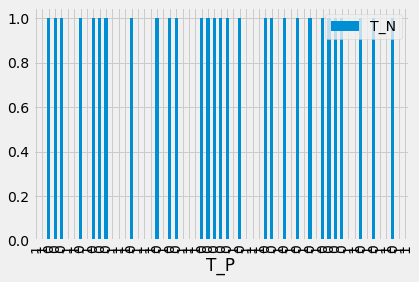

In [120]:
import matplotlib.pyplot as plt
pa_df.plot(kind='bar',x='T_P',y='T_N')